# Introduction
- KaggleのNMRコンペ(https://www.kaggle.com/c/champs-scalar-coupling/data)
- このノートブックでは、`magnetic_shielding_tensors`のEDAを行う

# Let's import everything I nead :)

In [10]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

# Data Preparation

**check datasets**

In [11]:
dir_data = './data/champs-scalar-coupling/'
path_list = glob.glob(dir_data + '*')
path_list

['./data/champs-scalar-coupling/magnetic_shielding_tensors.csv',
 './data/champs-scalar-coupling/structures.csv',
 './data/champs-scalar-coupling/mulliken_charges.csv',
 './data/champs-scalar-coupling/scalar_coupling_contributions.csv',
 './data/champs-scalar-coupling/train.csv',
 './data/champs-scalar-coupling/structures',
 './data/champs-scalar-coupling/test.csv',
 './data/champs-scalar-coupling/sample_submission.csv',
 './data/champs-scalar-coupling/dipole_moments.csv',
 './data/champs-scalar-coupling/potential_energy.csv']

**load csv**

In [12]:
path = './data/champs-scalar-coupling/magnetic_shielding_tensors.csv'
df = pd.read_csv(path)

# Pandas Plofiling

In [8]:
pdp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling bac

# EDA: magnetic_shielding_tensors.csv
- null なし

---

## Basics

In [13]:
df.head(5)

molecule_name  atom_index        XX      YX      ZX      XY        YY  \
0  dsgdb9nsd_000001           0  195.3150  0.0000 -0.0001  0.0000  195.3170   
1  dsgdb9nsd_000001           1   31.3410 -1.2317  4.0544 -1.2317   28.9546   
2  dsgdb9nsd_000001           2   31.5814  1.2173 -4.1474  1.2173   28.9036   
3  dsgdb9nsd_000001           3   31.5172  4.1086  1.2723  4.1088   33.9068   
4  dsgdb9nsd_000001           4   31.4029 -4.0942 -1.1793 -4.0944   34.0776   

       ZY      XZ      YZ        ZZ  
0  0.0007 -0.0001  0.0007  195.3170  
1 -1.7173  4.0546 -1.7173   34.0861  
2 -1.6036 -4.1476 -1.6036   33.8967  
3  1.6950  1.2724  1.6951   28.9579  
4  1.6259 -1.1795  1.6260   28.9013

In [14]:
df.tail(5)

molecule_name  atom_index       XX      YX      ZX      XY  \
1533532  dsgdb9nsd_133884          13  38.9961  3.3026 -0.0001 -1.7562   
1533533  dsgdb9nsd_133884          14  26.9291  0.6933 -0.8246  1.9653   
1533534  dsgdb9nsd_133884          15  26.9291  0.6933  0.8246  1.9654   
1533535  dsgdb9nsd_133884          16  28.9460  0.0146  2.5359 -2.0440   
1533536  dsgdb9nsd_133884          17  30.1753 -6.4689 -5.5474 -3.8417   

              YY      ZY      XZ      YZ       ZZ  
1533532  26.1603  0.0000  0.0001  0.0000  24.1113  
1533533  34.1115 -4.9683 -0.7688 -5.1307  29.9158  
1533534  34.1115  4.9683  0.7688  5.1307  29.9158  
1533535  24.9160 -1.7686  1.8798  0.9608  31.6697  
1533536  30.4761  6.3612 -1.5380  4.0582  29.4963

---> molecule_name 名にダブりあり

In [15]:
molecule_name_list = df['molecule_name'].unique()
print('n_molecule_name: ', len(molecule_name_list))

n_molecule_name:  85003


--->この数は、dipole_moments のときの、molecule_name 数と一緒
---> molecule の数は、85003個と考えてよさそう

**分布の数は同じ？**

In [29]:
n_per_molecule_name_list = []
for i in range(len(molecule_name_list)):
    n = sum(df['molecule_name']==molecule_name_list[i])
    n_per_molecule_name_list.append(n)
print(sum(n_per_molecule_name_list))

1533537


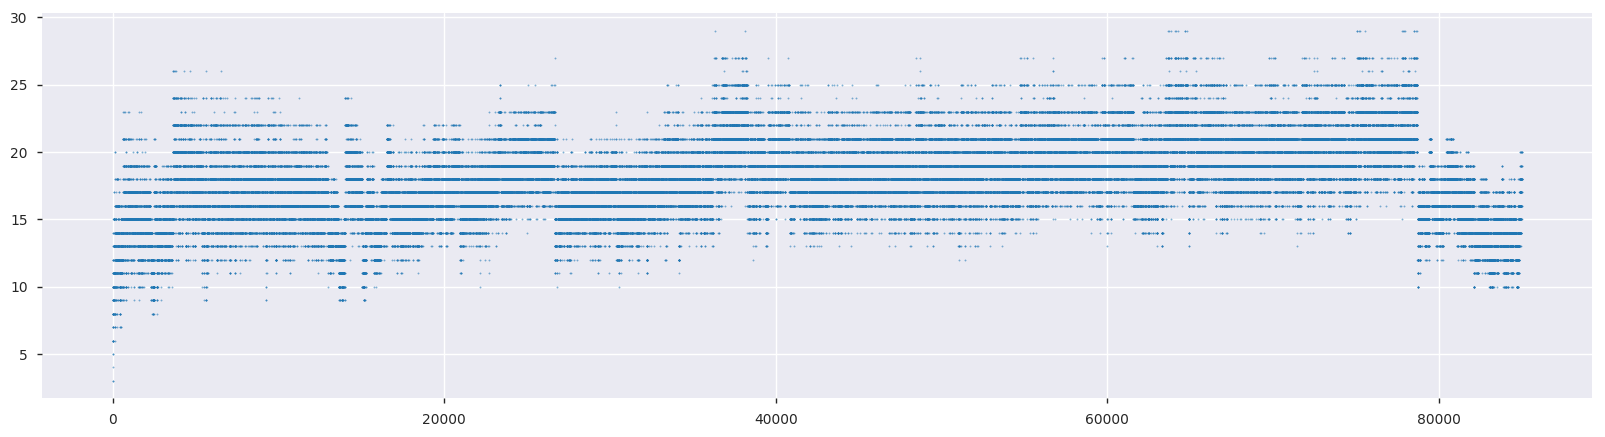

In [35]:
_x = np.arange(0, len(n_per_molecule_name_list))
plt.figure(figsize=(20, 5))
plt.scatter(_x, n_per_molecule_name_list, alpha=0.5, s=1)

(array([3.0000e+00, 2.0000e+00, 7.0000e+00, 4.4000e+01, 9.9000e+01,
        3.0200e+02, 2.1040e+03, 2.5550e+03, 4.4010e+03, 6.6490e+03,
        1.9991e+04, 1.1383e+04, 1.1795e+04, 1.6591e+04, 2.9330e+03,
        4.1590e+03, 1.7030e+03, 3.7000e+01, 2.2100e+02, 2.4000e+01]),
 array([ 3. ,  4.3,  5.6,  6.9,  8.2,  9.5, 10.8, 12.1, 13.4, 14.7, 16. ,
        17.3, 18.6, 19.9, 21.2, 22.5, 23.8, 25.1, 26.4, 27.7, 29. ]),
 <a list of 20 Patch objects>)

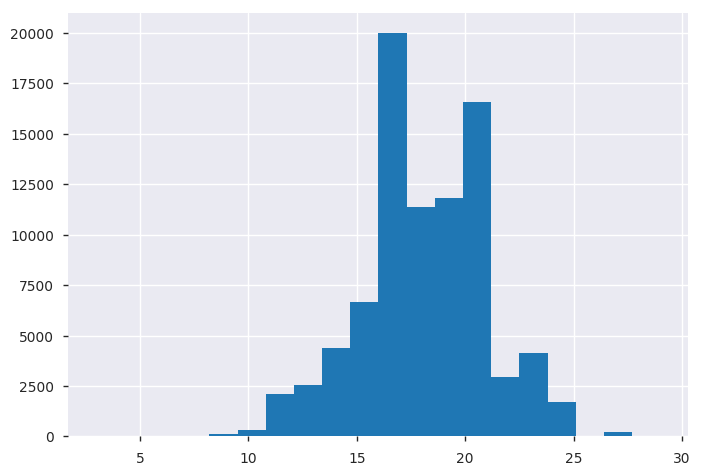

In [40]:
plt.hist(n_per_molecule_name_list, bins=20)

---> molecule_name が複数あったので、どの程度数の被りがあるか見てみた。

In [42]:
print('min n molecule_name: ', min(n_per_molecule_name_list))
print('max n molecule_name: ', max(n_per_molecule_name_list))

min n molecule_name:  3
max n molecule_name:  29


In [17]:
df.isnull().sum(axis=0)

molecule_name    0
atom_index       0
XX               0
YX               0
ZX               0
XY               0
YY               0
ZY               0
XZ               0
YZ               0
ZZ               0
dtype: int64

## Plot

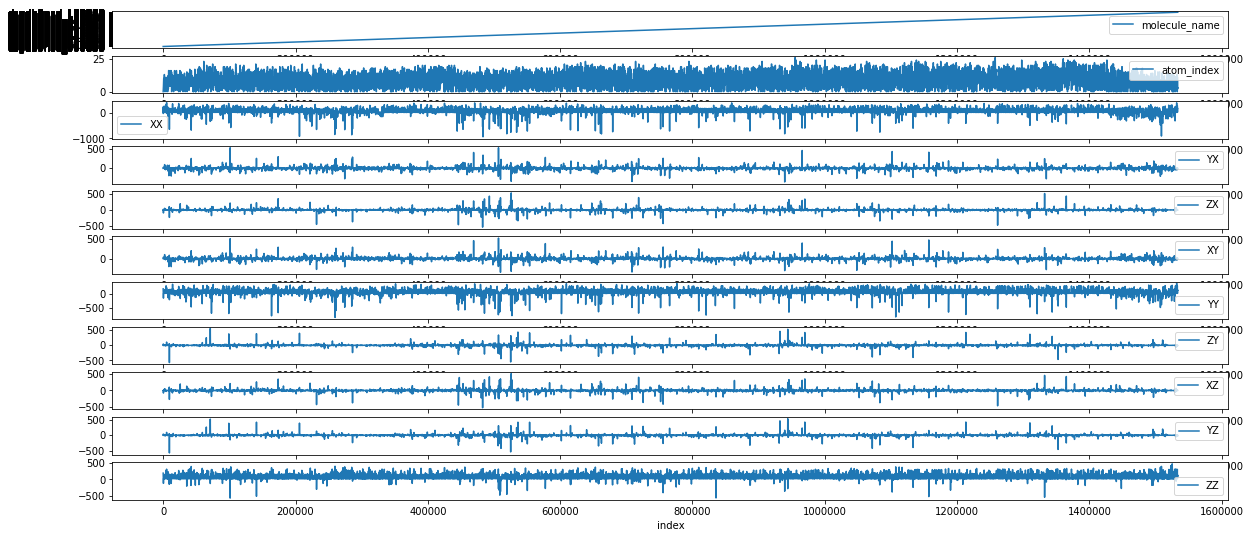

In [18]:
fig, axs = plt.subplots(len(df.columns),1, figsize=(20, 9))
axs = axs.ravel()
for i in range(len(df.columns)):
    if df.iloc[0, i] == str:
        break
    axs[i].plot(df.iloc[::200,i], label=df.columns[i])
    axs[i].set_xlabel('index')
    axs[i].legend()

---
**atom_index**

Text(0.5, 0, 'atom_index')

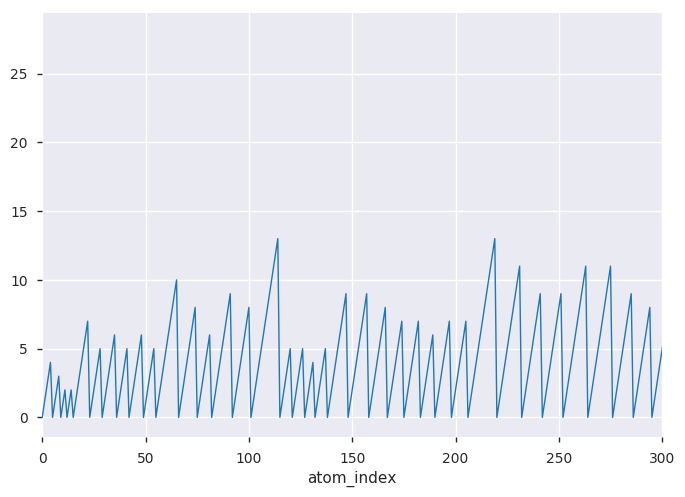

In [54]:
plt.plot(np.arange(0,len(df.index)), df['atom_index'], lw=1)
plt.xlim(0, 300)
plt.xlabel('atom_index')

---> atom_index が周期的に並んでいる...。どういうことだろう。  
---> molecule_nameと、atom_index だけ並べて見てみる。

In [56]:
df.iloc[:, 0:2].head(30)

molecule_name  atom_index
0   dsgdb9nsd_000001           0
1   dsgdb9nsd_000001           1
2   dsgdb9nsd_000001           2
3   dsgdb9nsd_000001           3
4   dsgdb9nsd_000001           4
5   dsgdb9nsd_000002           0
6   dsgdb9nsd_000002           1
7   dsgdb9nsd_000002           2
8   dsgdb9nsd_000002           3
9   dsgdb9nsd_000003           0
10  dsgdb9nsd_000003           1
11  dsgdb9nsd_000003           2
12  dsgdb9nsd_000005           0
13  dsgdb9nsd_000005           1
14  dsgdb9nsd_000005           2
15  dsgdb9nsd_000007           0
16  dsgdb9nsd_000007           1
17  dsgdb9nsd_000007           2
18  dsgdb9nsd_000007           3
19  dsgdb9nsd_000007           4
20  dsgdb9nsd_000007           5
21  dsgdb9nsd_000007           6
22  dsgdb9nsd_000007           7
23  dsgdb9nsd_000008           0
24  dsgdb9nsd_000008           1
25  dsgdb9nsd_000008           2
26  dsgdb9nsd_000008           3
27  dsgdb9nsd_000008           4
28  dsgdb9nsd_000008           5
29  dsgdb9nsd_000009           0

---> atom_index はmolecule内の原子に数字を割り当てているということか！
---> このcsvに入っている物理量は、原子一つひとつに着目している。一つの分子に複数の原子が属しているため、molecule_name に名前のダブリがある。

## 相関見てみる

**pair plot**

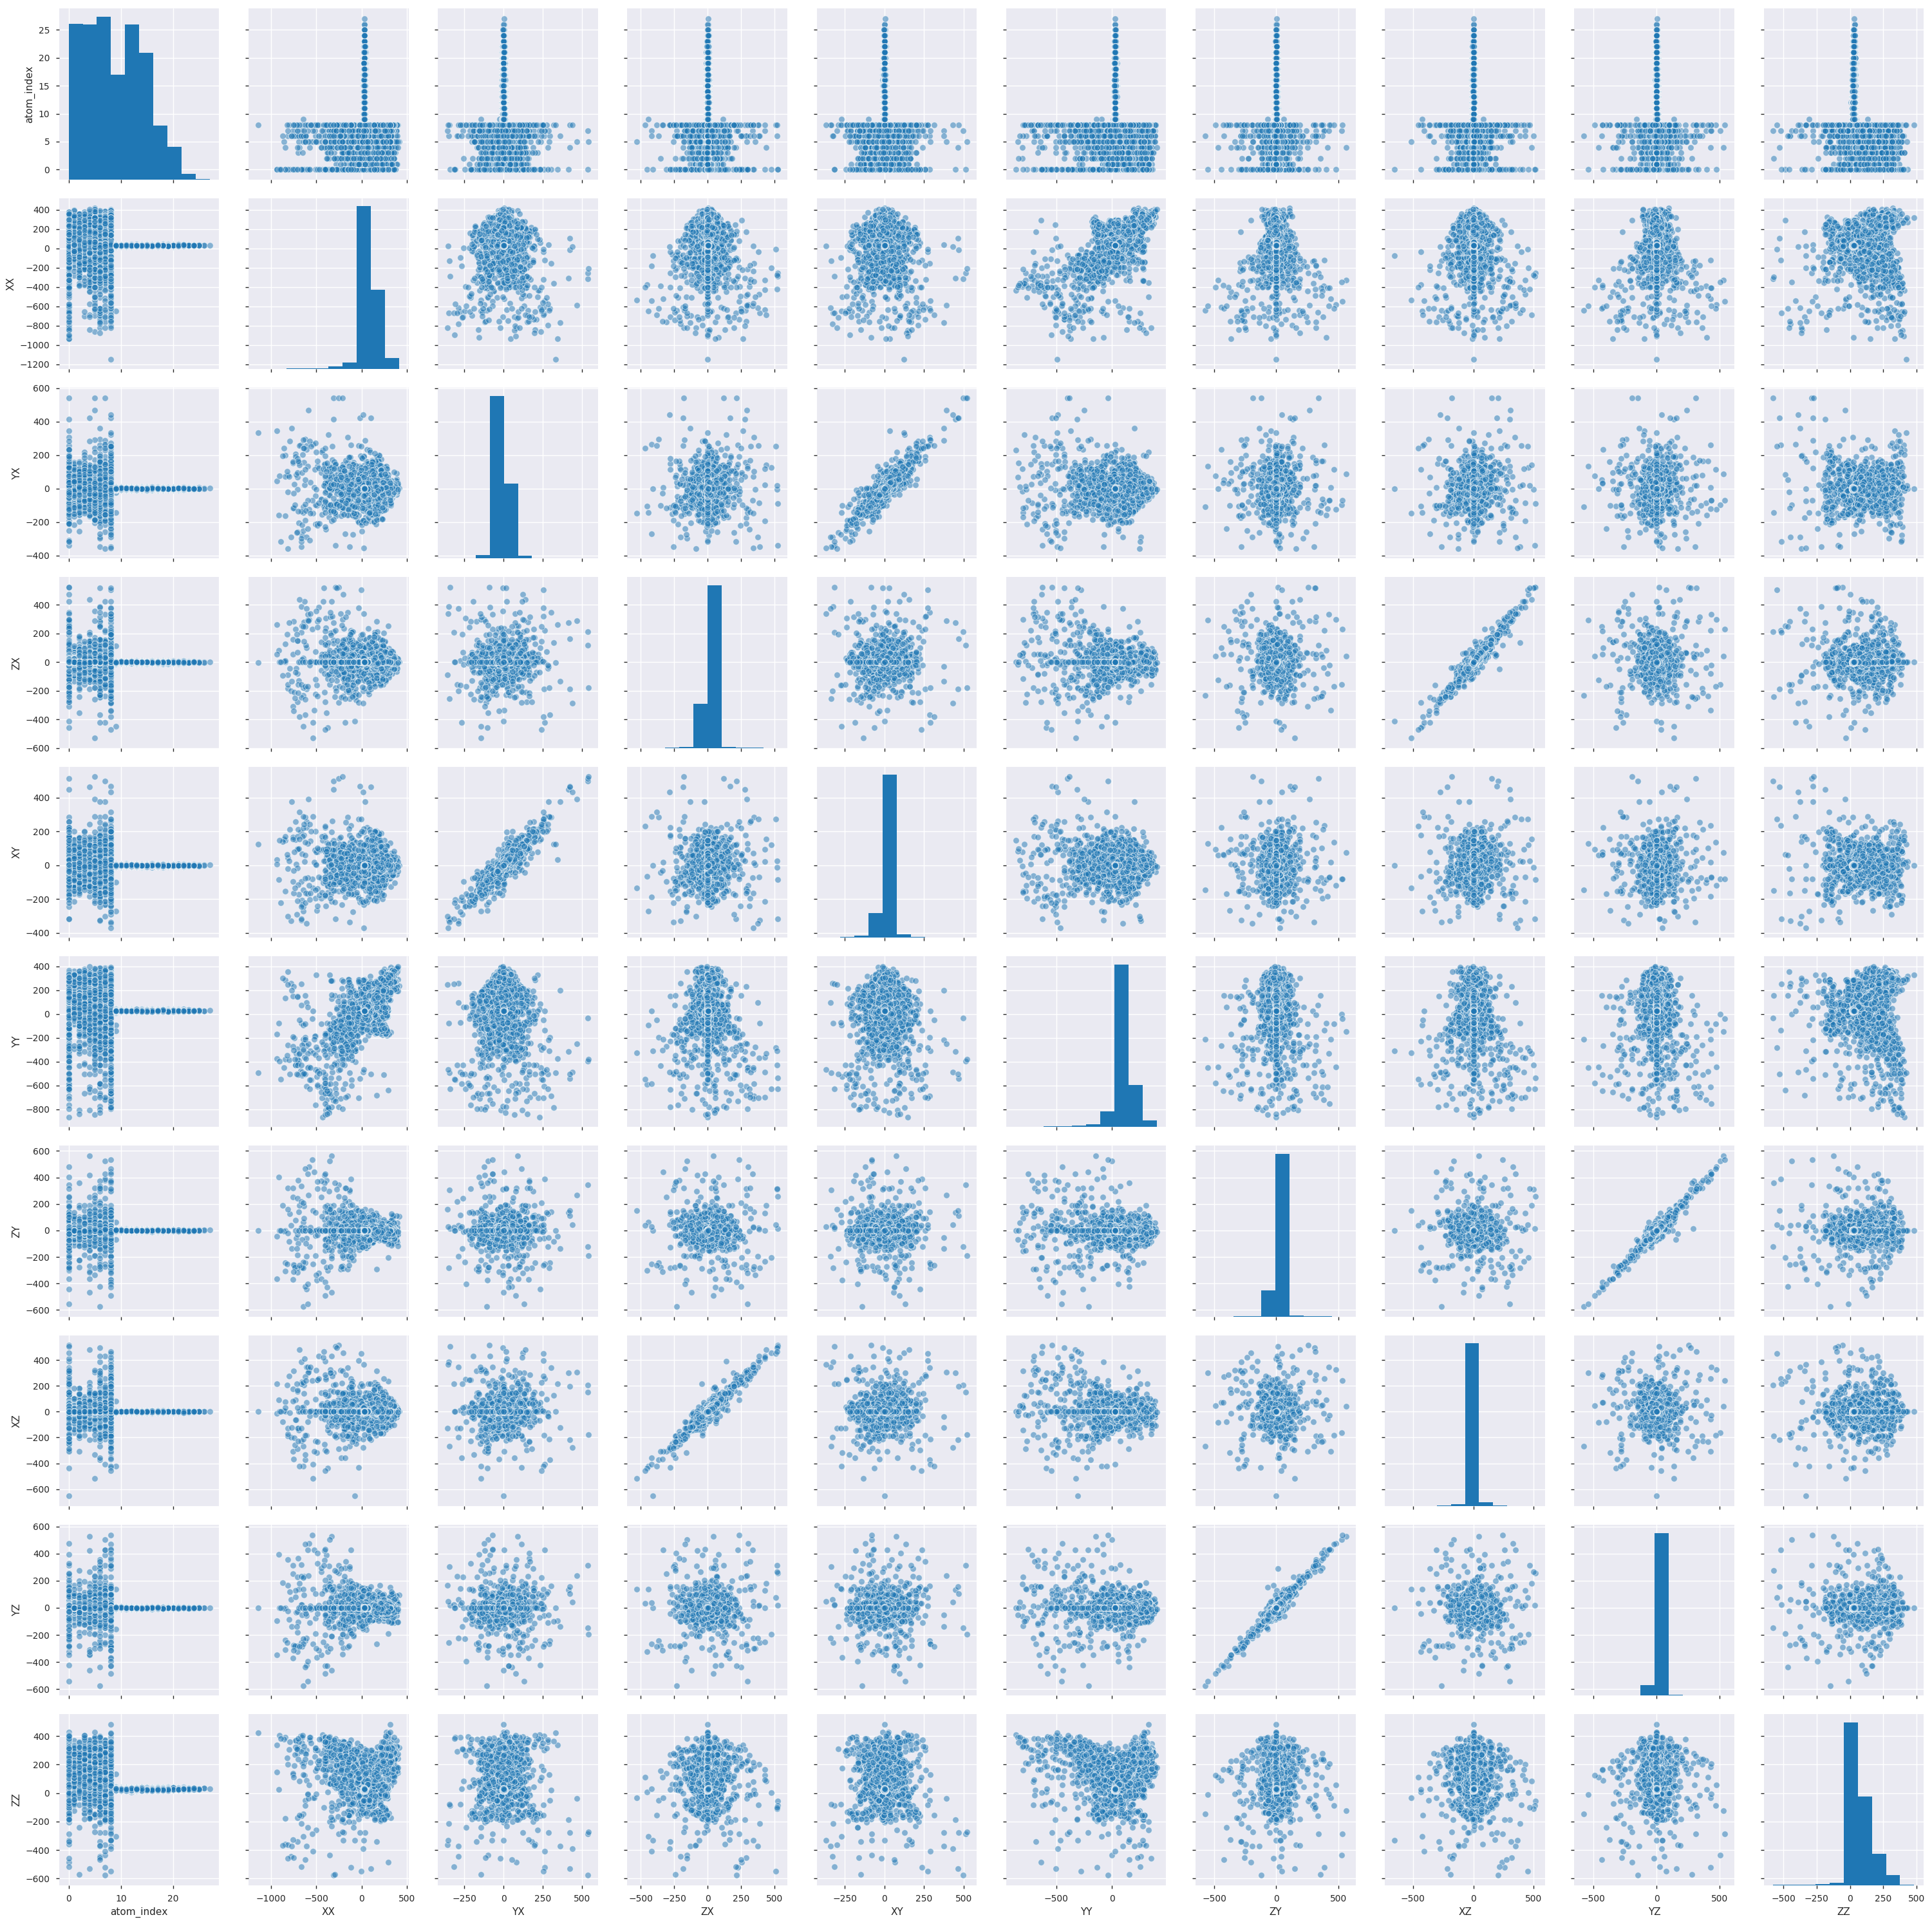

In [45]:
sns.pairplot(df.iloc[::100, :], height=3, plot_kws=dict(alpha=0.5))

**heat map**

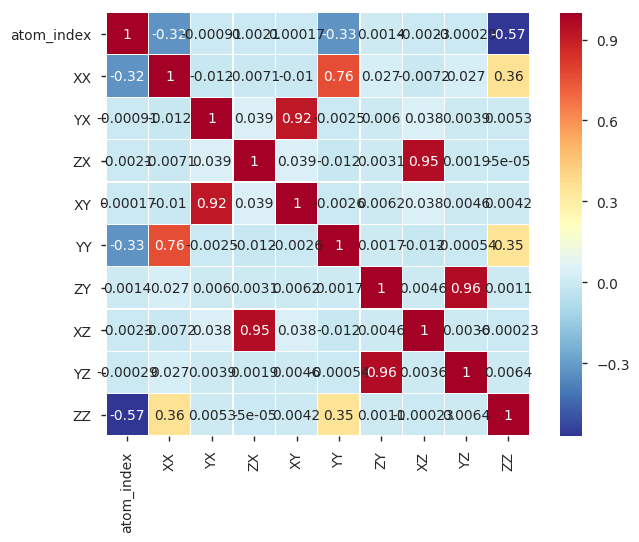

In [59]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlBu_r', linecolor='white', annot=True)

---> XX YY ZZ につよい相関あり